<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

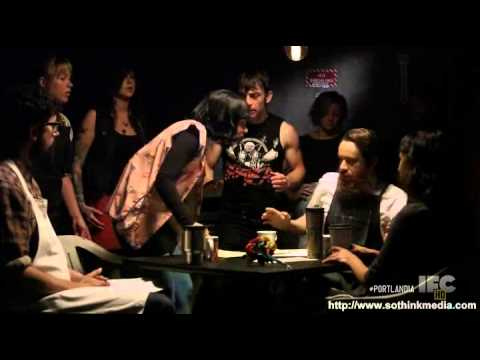

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [101]:
import re
import spacy
from spacy.tokenizer import Tokenizer

In [104]:
nlp=spacy.load('en_core_web_lg')
tokenizer=Tokenizer(nlp.vocab)

In [254]:
tokens= []

for doc in tokenizer.pipe(shops['full_review_text']):
    doctoken=[]
    STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'coffee', 'i', 'Coffee', 'it', 
                                                "it's", 'it.', 'the', 'this', 'im', "i'm",
                                               'austin', 'Shop',"ive", 'place'])
    for token in doc:
        if (re.sub(r'[^a-zA-Z ^0-9]', '', token.text.lower()) not in STOP_WORDS):
            if (token.is_punct != True) & (token.text!=' '):
                doctoken.append(token.lemma_.lower())
    #removes the dates
    del doctoken[:1]
    #removes the check in counts
    try:
        int(doctoken[0])
        del doctoken[:2]
    except:
        pass
    #removes all the empty strings
    doctoken=list(filter(lambda x: x!='', doctoken))
    doctoken=[re.sub(r'[^a-zA-Z ^0-9]', '', text) for text in doctoken]
    tokens.append(doctoken)

shops['tokenizer']=tokens

In [255]:
shops['tokenizer']

0       [love, love, love, atmosphere, corner, shop, s...
1       [listed, date, night, ambiance, beautiful, lov...
2       [listed, brunch, spots, love, eclectic, homey,...
3       [cool, decor, good, drink, nice, seat, overpri...
4       [locate, northcross, mall, shop, center, face,...
5       [cute, cafe, think, moment, step, wasnt, didnt...
6       [listed, nuptial, bliss, anderson, lane, new, ...
7       [love, 5, star, cleanliness, 5, star, fun, amb...
8       [ok, lets, try, approach, pros, music, seating...
9       [show, social, medium, day, finally, visited, ...
10      [listed, americano, average, cute, study, spot...
11      [store, decoration, honestly, good, shop, surr...
12      [listed, 2016, time, charm, factory, decor, in...
13      [cute, little, cafe, drive, time, hadnt, notic...
14      [beautiful, eccentric, shop, library, peculiar...
15      [listed, search, fantastic, didnt, want, write...
16      [love, atmosphere, frequent, shop, definitely,...
17      [check

In [192]:

# Start here
shops['full_review_text']
def tokenize(text):
    tokens=re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens=tokens.lower().split(' ')
    #removes the dates
    del tokens[:2]
    #removes the check in counts
    try:
        int(tokens[0])
        del tokens[:2]
    except:
        pass
    #removes all the empty strings
    tokens=list(filter(lambda x: x!='', tokens))
    return tokens

def stars(text):
    stars=text.split()
    stars=int(list(stars[0])[0])
    return stars


In [193]:
shops['stars']=shops['star_rating'].apply(stars)

In [194]:
shops['tokens']=shops['full_review_text'].apply(tokenize)

In [195]:
shops['tokens'][0]

['love',
 'love',
 'loved',
 'the',
 'atmosphere',
 'every',
 'corner',
 'of',
 'the',
 'coffee',
 'shop',
 'had',
 'its',
 'own',
 'style',
 'and',
 'there',
 'were',
 'swings',
 'i',
 'ordered',
 'the',
 'matcha',
 'latte',
 'and',
 'it',
 'was',
 'muy',
 'fantastico',
 'ordering',
 'and',
 'getting',
 'my',
 'drink',
 'were',
 'pretty',
 'streamlined',
 'i',
 'ordered',
 'on',
 'an',
 'ipad',
 'which',
 'included',
 'all',
 'beverage',
 'selections',
 'that',
 'ranged',
 'from',
 'coffee',
 'to',
 'wine',
 'desired',
 'level',
 'of',
 'sweetness',
 'and',
 'a',
 'checkout',
 'system',
 'i',
 'got',
 'my',
 'latte',
 'within',
 'minutes',
 'i',
 'was',
 'hoping',
 'for',
 'a',
 'typical',
 'heart',
 'or',
 'feather',
 'on',
 'my',
 'latte',
 'but',
 'found',
 'myself',
 'listing',
 'out',
 'all',
 'the',
 'possibilities',
 'of',
 'what',
 'the',
 'art',
 'may',
 'be',
 'any',
 'ideas']

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [196]:
from collections import Counter

In [204]:
cnter=Counter()
shops.tokenizer.apply(lambda x: cnter.update(x))
cnter.most_common(10)

[('place', 5426),
 ('good', 3973),
 ('great', 3919),
 ('like', 3088),
 ('love', 1935),
 ('time', 1884),
 ('food', 1836),
 ('nice', 1741),
 ('shop', 1680),
 ('friendly', 1659)]

In [29]:
shops.shape

(7616, 5)

In [219]:
def countbyrate(rating):
    '''rating is in number of stars to see word counts for'''
    df=shops[shops['stars'] == rating]
    return df

def countrates(ratings):
    df=pd.DataFrame(columns=shops.columns)
    for rate in ratings:
        df=df.append(countbyrate(rate))
    count=Counter()
    df['tokenizer'].apply(lambda x: count.update(x))
    return count

In [220]:
countrates([1,2,3]).most_common(10)

[('place', 1112),
 ('good', 877),
 ('like', 876),
 ('food', 484),
 ('time', 478),
 ('great', 466),
 ('dont', 449),
 ('service', 445),
 ('people', 375),
 ('pretty', 363)]

In [221]:
countrates([4,5]).most_common(10)

[('place', 4314),
 ('great', 3453),
 ('good', 3096),
 ('like', 2212),
 ('love', 1725),
 ('friendly', 1462),
 ('time', 1406),
 ('nice', 1395),
 ('shop', 1370),
 ('food', 1352)]

In [257]:
good=shops[shops['stars']>3]
bad=shops[shops['stars']<4]
goodcount=Counter()
badcount=Counter()
good['tokenizer'].apply(lambda x: goodcount.update(x))
bad['tokenizer'].apply(lambda x: badcount.update(x))
pass

In [247]:
#coppied from lecture 
#I did go through it line by line to make sure I know how it works
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [258]:
goodCount=count(good['tokenizer'])
badCount=count(bad['tokenizer'])

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [259]:
topGood=goodCount.head(20)

In [260]:
topBad=badCount.head(20)

In [261]:
import squarify
import matplotlib.pyplot as plt

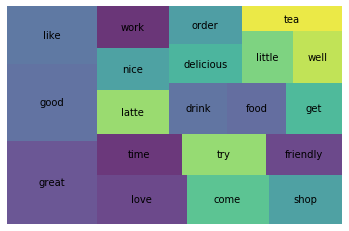

In [262]:
def sqPlot(df):
    squarify.plot(sizes=df['pct_total'], label=df['word'], alpha=.8)
    plt.axis('off')
    plt.show()

sqPlot(topGood)

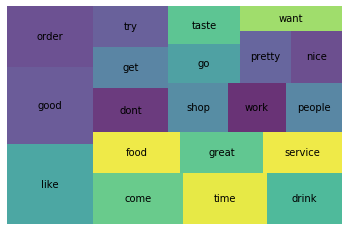

In [263]:
sqPlot(topBad)

### Analysis

the good appears to have words like 'delicious', 'best', and 'friendly' which paints an overall positive picture, while the bad has little clusters like 'order', 'didn't' and 'come' all together, which doesn't mean that they go together but doesn't paint as nice of a picture overall as the higher ratings. 


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

